In [2]:
from vmas.simulator.scenario import BaseScenario
from typing import Union
import time
import torch
from vmas import make_env
from moviepy.editor import ImageSequenceClip

In [3]:
def use_vmas_env(
    render: bool = False,
    save_render: bool = False,
    num_envs: int = 32,
    n_steps: int = 100,
    device: str = "cpu",
    scenario: Union[str, BaseScenario] = "waterfall",
    n_agents: int = 4,
    continuous_actions: bool = True,
    **kwargs
):
    """Example function to use a vmas environment

    Args:
        continuous_actions (bool): Whether the agents have continuous or discrete actions
        n_agents (int): Number of agents
        scenario (str): Name of scenario
        device (str): Torch device to use
        render (bool): Whether to render the scenario
        save_render (bool):  Whether to save render of the scenario
        num_envs (int): Number of vectorized environments
        n_steps (int): Number of steps before returning done

    Returns:

    """
    assert not (
        save_render and not render), "To save the video you have to render it"

    simple_2d_action = (
        [0, -1.0] if continuous_actions else [3]
    )  # Simple action for an agent with 2d actions

    scenario_name = scenario if isinstance(
        scenario, str) else scenario.__class__.__name__

    env = make_env(
        scenario=scenario,
        num_envs=num_envs,
        device=device,
        continuous_actions=continuous_actions,
        wrapper=None,
        seed=None,
        # Environment specific variables
        n_agents=n_agents,
        **kwargs
    )

    frame_list = []  # For creating a gif
    init_time = time.time()
    step = 0

    for s in range(n_steps):
        step += 1
        print(f"Step {step}")

        actions = []
        for i, agent in enumerate(env.agents):
            action = torch.tensor(
                simple_2d_action,
                device=device,
            ).repeat(num_envs, 1)

            actions.append(action)

        obs, rews, dones, info = env.step(actions)

        if render:
            frame = env.render(
                mode="rgb_array" if save_render else "human",
                agent_index_focus=None,  # Can give the camera an agent index to focus on
                visualize_when_rgb=True,
            )
            if save_render:
                frame_list.append(frame)

    total_time = time.time() - init_time
    print(
        f"It took: {total_time}s for {n_steps} steps of {num_envs} parallel environments on device {device} "
        f"for {scenario_name} scenario."
    )

    if render and save_render:
        fps = 30
        clip = ImageSequenceClip(frame_list, fps=fps)
        clip.write_gif(f'{scenario_name}.gif', fps=fps)

In [6]:
scenario_name = "waterfall"
use_vmas_env(
    scenario=scenario_name,
    render=True,
    save_render=True,
    num_envs=32,
    n_steps=60,
    device="cpu",
    continuous_actions=True,
    # Environment specific variables
    n_agents=4,
)

Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8
Step 9
Step 10
Step 11
Step 12
Step 13
Step 14
Step 15
Step 16
Step 17
Step 18
Step 19
Step 20
Step 21
Step 22
Step 23
Step 24
Step 25
Step 26
Step 27
Step 28
Step 29
Step 30
Step 31
Step 32
Step 33
Step 34
Step 35
Step 36
Step 37
Step 38
Step 39
Step 40
Step 41
Step 42
Step 43
Step 44
Step 45
Step 46
Step 47
Step 48
Step 49
Step 50
Step 51
Step 52
Step 53
Step 54
Step 55
Step 56
Step 57
Step 58
Step 59
Step 60
It took: 4.557122468948364s for 60 steps of 32 parallel environments on device cpu for waterfall scenario.
MoviePy - Building file waterfall.gif with imageio.


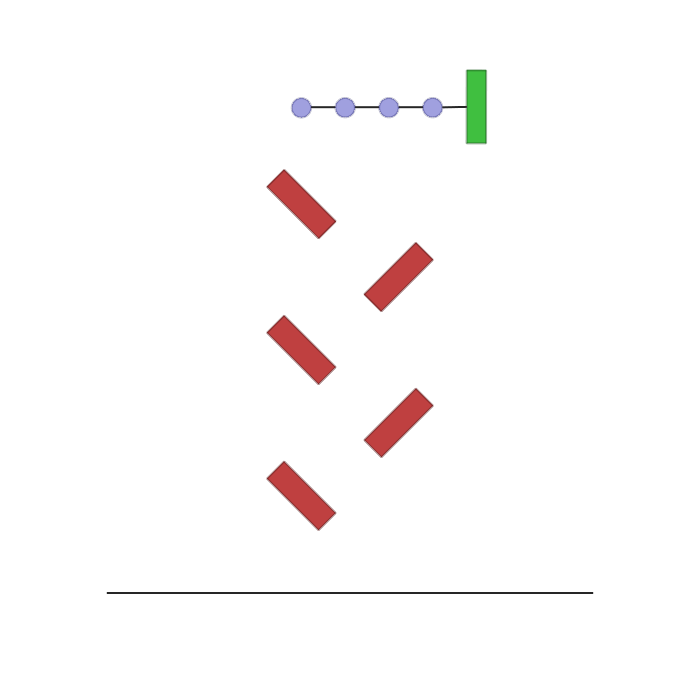

In [7]:
from IPython.display import Image
Image(f'{scenario_name}.gif')